In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
Wine = pd.read_csv('winequalityN.csv')
Wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
Wine.shape

(6497, 13)

In [27]:
len(Wine)

6497

In [28]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [29]:
Wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

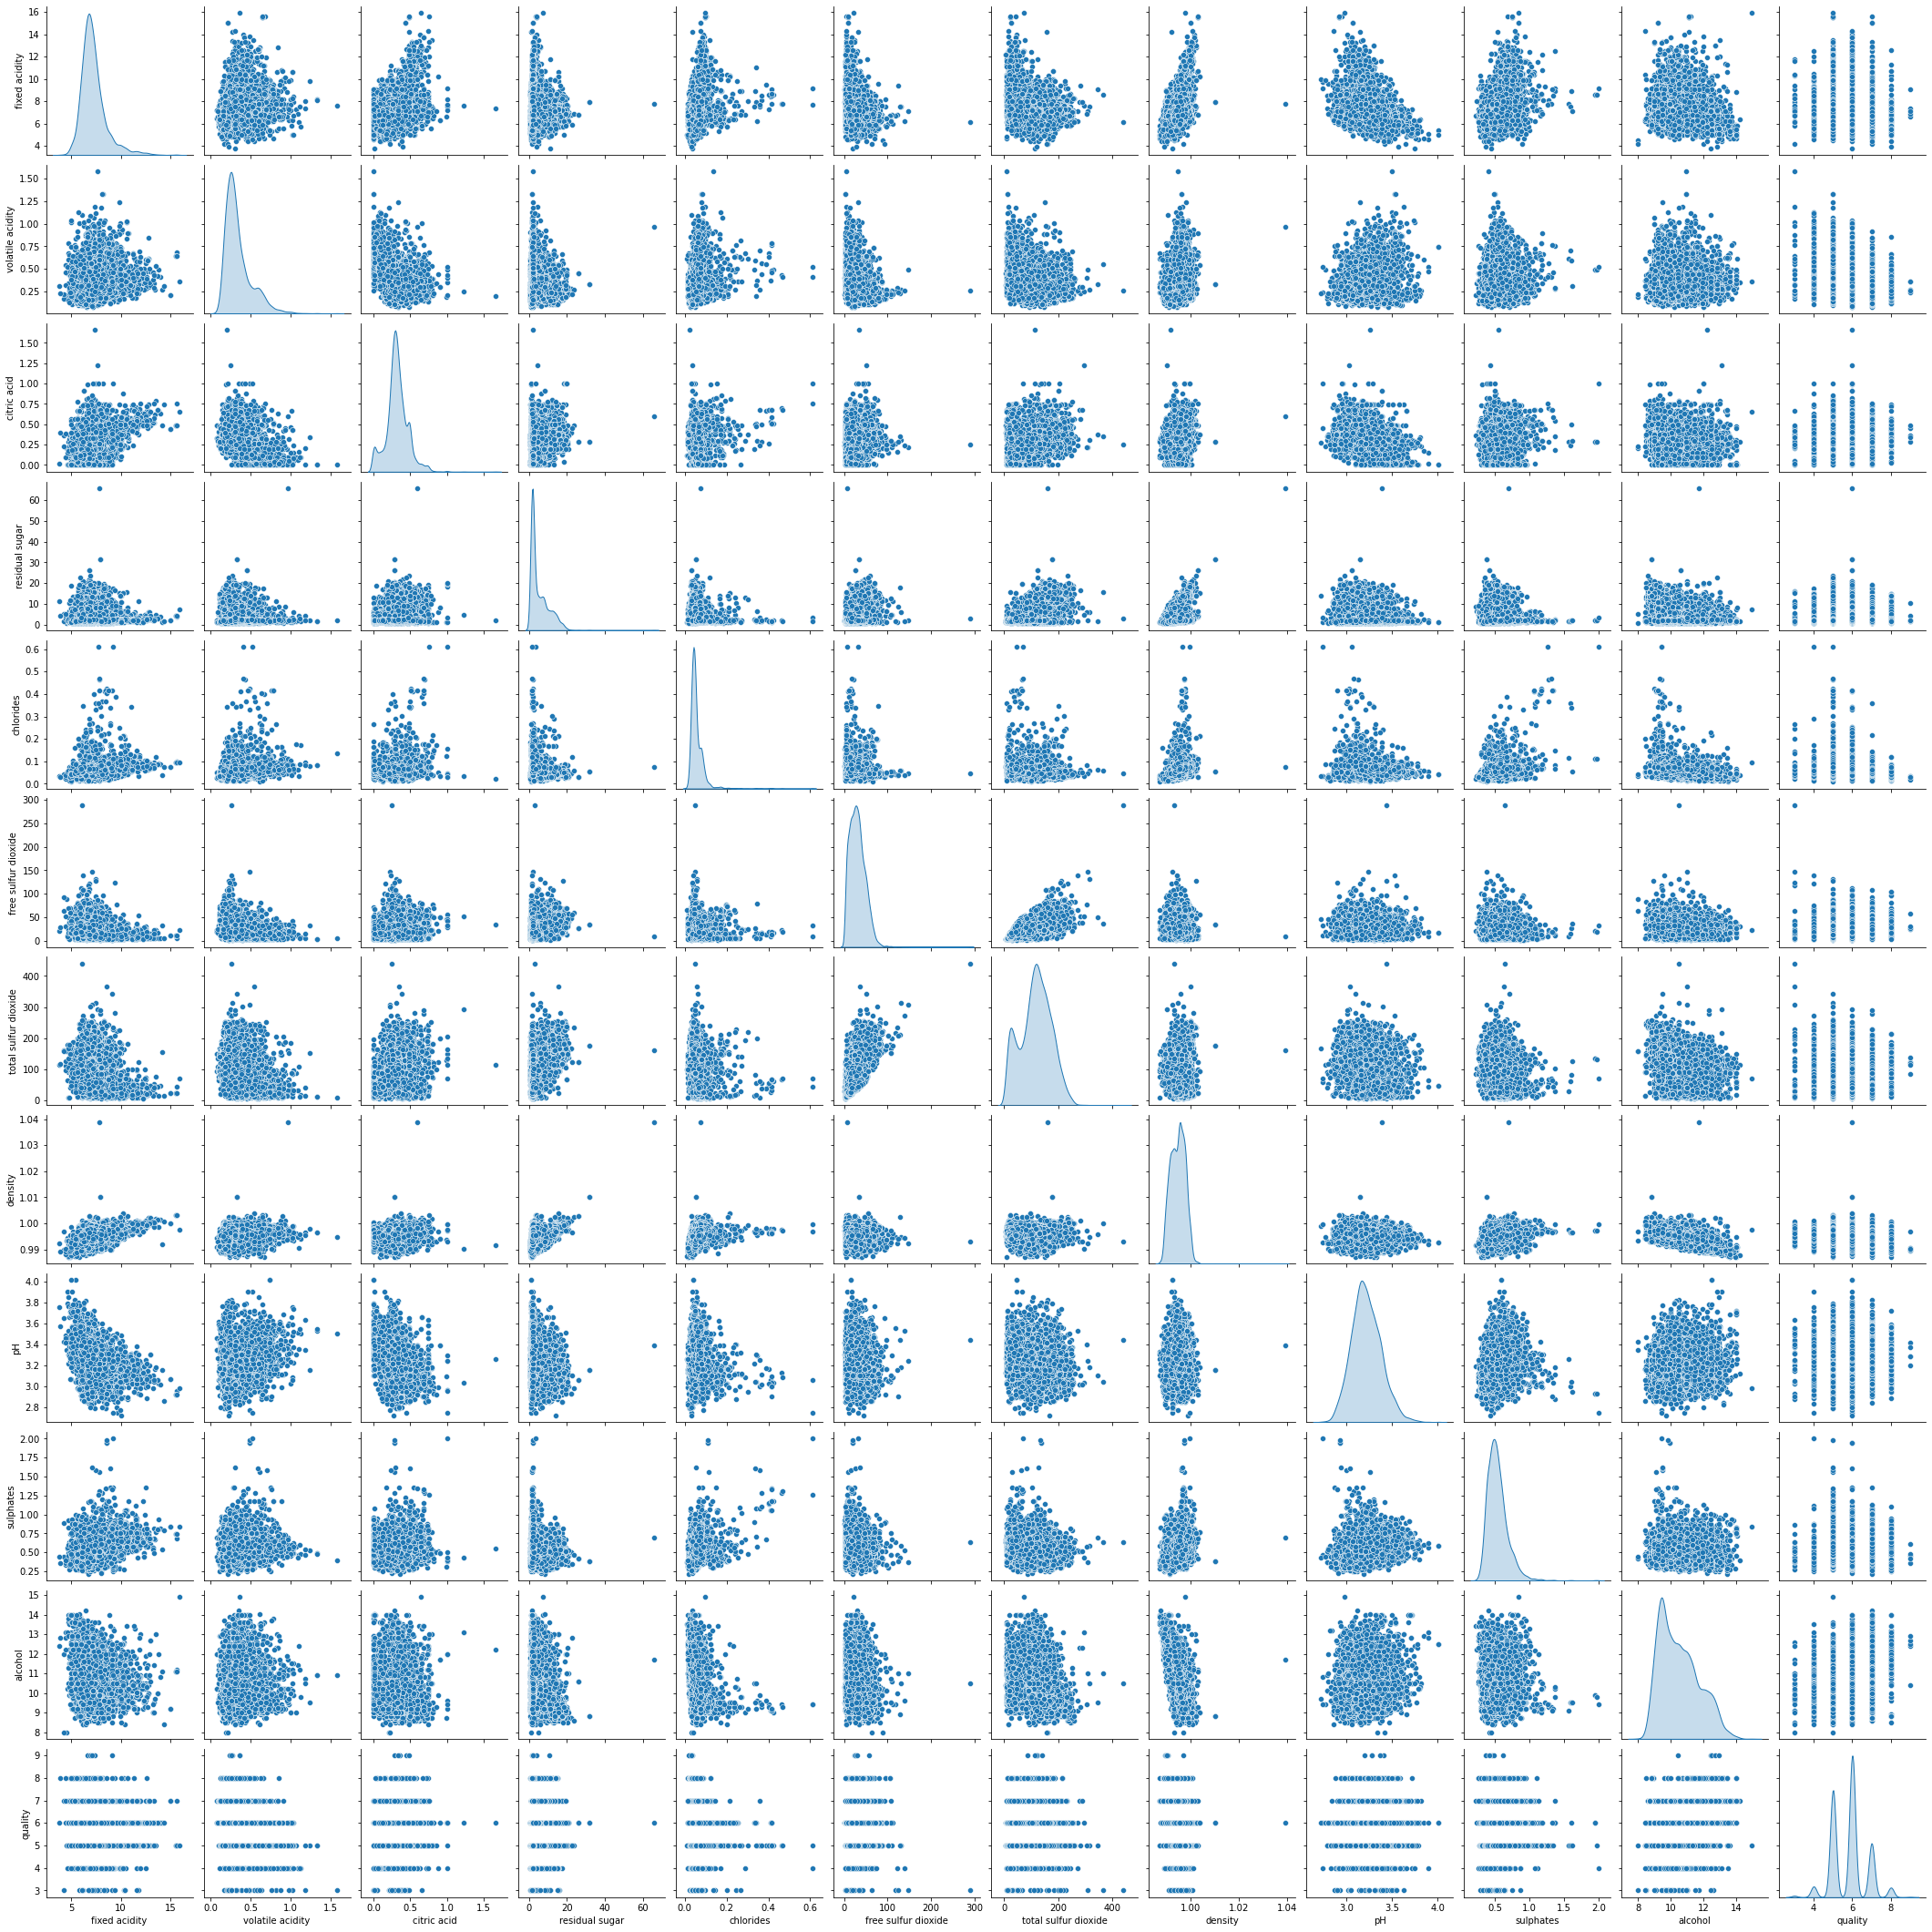

In [30]:
sns.pairplot(data=Wine, diag_kind='kde')

In [31]:
Wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [32]:
missing_values_per = Wine.isna().sum()/Wine.isna().count()

In [33]:
Wine.isnull().sum().sort_values(ascending=False)/Wine.shape[0]

fixed acidity           0.001539
pH                      0.001385
volatile acidity        0.001231
sulphates               0.000616
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
type                    0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [34]:
Wine.dropna(inplace=True)

In [35]:
# Fill the columns
Wine["fixed acidity"].fillna("missing", inplace=True)
Wine["pH"].fillna("missing", inplace=True)
Wine["volatile acidity"].fillna("missing", inplace=True)
Wine["sulphates"].fillna("missing", inplace=True)
Wine["citric acid"].fillna("missing", inplace=True)
Wine["residual sugar"].fillna("missing", inplace=True)
Wine["chlorides"].fillna("missing", inplace=True)

In [36]:
# create features and labels
X = Wine.drop('quality', axis=1)
y = Wine['quality']

In [37]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [38]:
y.head(), y.value_counts()

(0    6
 1    6
 2    6
 3    6
 4    6
 Name: quality, dtype: int64,
 6    2820
 5    2128
 7    1074
 4     214
 8     192
 3      30
 9       5
 Name: quality, dtype: int64)

In [39]:
X.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [40]:
np.random.seed(42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


lr = LogisticRegression(random_state=40)
#model = Ridge()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5170, 12), (1293, 12), (5170,), (1293,))

In [41]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<6463x2650 sparse matrix of type '<class 'numpy.float64'>'
	with 77556 stored elements in Compressed Sparse Row format>

In [42]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 33)\t1.0\n (0, 144)\t1.0..."
1,"(0, 1)\t1.0\n (0, 25)\t1.0\n (0, 150)\t1.0..."
2,"(0, 1)\t1.0\n (0, 45)\t1.0\n (0, 146)\t1.0..."
3,"(0, 1)\t1.0\n (0, 36)\t1.0\n (0, 136)\t1.0..."
4,"(0, 1)\t1.0\n (0, 36)\t1.0\n (0, 136)\t1.0..."
...,...
6458,"(0, 0)\t1.0\n (0, 31)\t1.0\n (0, 209)\t1.0..."
6459,"(0, 0)\t1.0\n (0, 24)\t1.0\n (0, 205)\t1.0..."
6460,"(0, 0)\t1.0\n (0, 25)\t1.0\n (0, 190)\t1.0..."
6461,"(0, 0)\t1.0\n (0, 20)\t1.0\n (0, 214)\t1.0..."


In [43]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size=0.2)

lr.fit(X_train, y_train)

C:\Users\Henry Morgan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [44]:
# Check the score of the model (on the test set)
lr.score(X_test, y_test)

0.5498839907192575

In [45]:
X.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5170, 2650), (1293, 2650), (5170,), (1293,))

In [47]:
y.tail()

6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, dtype: int64

In [48]:
# Make predictions
y_preds = model.predict(X_test)

In [49]:
y_preds[:10]

array([5.76039748, 5.69227396, 6.30851879, 6.06986544, 6.20424768,
       5.45544158, 6.63114856, 5.1881949 , 5.73516631, 6.6518776 ])

In [50]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [51]:
y_test_mean[:10]

array([5.82753287, 5.82753287, 5.82753287, 5.82753287, 5.82753287,
       5.82753287, 5.82753287, 5.82753287, 5.82753287, 5.82753287])

In [52]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [53]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Make predictions
y_preds = lr.predict(X_test)

# Evaluate model using evaluation functions
print("LogisticRegression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

LogisticRegression metrics on the test set
R2 score: 0.12058079759649132
MAE: 0.5297757153905646
MSE: 0.6968290796597061


In [55]:
print(f"Model accuracy on test set: {lr.score(X_test, y_test) * 100:.2f}%")

Model accuracy on test set: 54.99%
